<a href="https://colab.research.google.com/github/divyam123-EECS-Physics/Water-Bottle-Price-Prediction/blob/main/Feature%20Engineering%20and%20Exploration%20Water%20Bottle%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns', None)

In [ ]:
base_file = '/content/drive/MyDrive/TFProject/'
train_df_path = base_file + 'water-bottle-train-set.csv'

In [ ]:
df = pd.read_csv(train_df_path)

In [ ]:
 df = df.drop(columns = ['Unnamed: 0'])
 df.columns, len(df.columns)

(Index(['Name', 'Brand', 'Pack Size', 'Water Source', 'Falvor', 'Container',
        'Price', '100% Natural', 'Anti-Oxidant', 'Artesian', 'BPA Free Plastic',
        'Caffeinated', 'Carbonated', 'Electrolytes', 'Energy Drinks',
        'Enhanced', 'Ethically Sourced', 'Fair Trade', 'Flavored',
        'Gluten FREE', 'Green Tea', 'Kosher', 'Low Calorie', 'Mineral Water',
        'No Artifical Flavors', 'No Artifical Preservatives',
        'No Artifical Sweetners', 'Non-Alcoholic Wine', 'Non GMO',
        'Non-Sparkling Water', 'Nutritional', 'Organic', 'Organic Cane Sugar',
        'Preservatice Free', 'Purified Water', 'Regular Soda', 'Sodium-Free',
        'Soy FREE', 'Sparkling Juice', 'Sparkling Water', 'Spring Water',
        'Sweetened', 'Tea', 'Twist off Top', 'USDA Organic',
        'Under 100 Calories', '30 Calories', 'Variety Pack', 'Vegan',
        'Zero Carb', 'Zero Calorie', 'Zero Sodium', 'Zero Calories',
        'Zero Sugar', 'Zero Sweeteners', 'Beverage Size', 'Flavor',

In [ ]:
df = df.drop(columns = ['Name', 'Falvor','Preservatice Free'])

In [ ]:
df.isnull().sum()

Brand                            0
Pack Size                        0
Water Source                   222
Container                        0
Price                            0
100% Natural                     0
Anti-Oxidant                     0
Artesian                         0
BPA Free Plastic                 0
Caffeinated                      0
Carbonated                       0
Electrolytes                     0
Energy Drinks                    0
Enhanced                         0
Ethically Sourced                0
Fair Trade                       0
Flavored                         0
Gluten FREE                      0
Green Tea                        0
Kosher                           0
Low Calorie                      0
Mineral Water                    0
No Artifical Flavors             0
No Artifical Preservatives       0
No Artifical Sweetners           0
Non-Alcoholic Wine               0
Non GMO                          0
Non-Sparkling Water              0
Nutritional         

In [ ]:
# we will be fixing missing values first

In [ ]:
null_features = []
for col in df.columns:
  if df[col].isnull().sum() >= 1:
    null_features.append(col)
null_features

['Water Source',
 'Flavor',
 'No Artificial Preservatives',
 'Preservative FREE',
 'No Artificial Flavors',
 'No Artificial Sweeteners']

In [ ]:
df['Water Source'] = df['Water Source'].fillna('local')

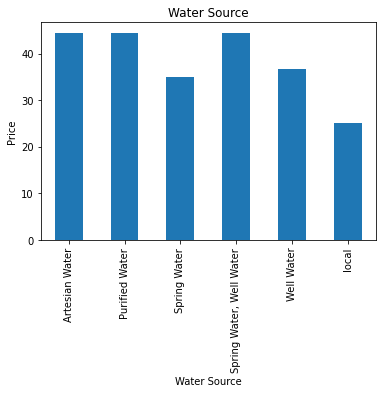

In [ ]:
df2 = df[['Price','Water Source']]
df2.groupby('Water Source')['Price'].median().plot.bar()
plt.xlabel('Water Source')
plt.ylabel('Price')
plt.title('Water Source')
plt.show()

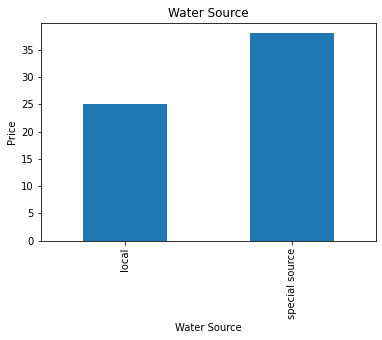

In [ ]:
df2 = df[['Price','Water Source']].copy()
to_be_replaced = df2.loc[df2['Water Source'] != 'local']['Water Source'].unique().tolist()
df2['Water Source'] = df2['Water Source'].replace(to_replace = to_be_replaced, value = 'special source')
df2.groupby('Water Source')['Price'].median().plot.bar()
plt.xlabel('Water Source')
plt.ylabel('Price')
plt.title('Water Source')
plt.show()


We will fill Nans in Flavor with None because a company might not always mention the fact that a water bottle is unflavored. 

In [ ]:
df['Flavor'] = df['Flavor'].fillna('None')

In [ ]:
df.isnull().sum()

Brand                            0
Pack Size                        0
Water Source                     0
Container                        0
Price                            0
100% Natural                     0
Anti-Oxidant                     0
Artesian                         0
BPA Free Plastic                 0
Caffeinated                      0
Carbonated                       0
Electrolytes                     0
Energy Drinks                    0
Enhanced                         0
Ethically Sourced                0
Fair Trade                       0
Flavored                         0
Gluten FREE                      0
Green Tea                        0
Kosher                           0
Low Calorie                      0
Mineral Water                    0
No Artifical Flavors             0
No Artifical Preservatives       0
No Artifical Sweetners           0
Non-Alcoholic Wine               0
Non GMO                          0
Non-Sparkling Water              0
Nutritional         

In [ ]:
pres_labels = ['No Artificial Preservatives','Preservative FREE','No Artificial Flavors','No Artificial Sweeteners']


In [ ]:
df[pres_labels] = df[pres_labels].fillna(0)

In [ ]:
df.isnull().sum()

Brand                          0
Pack Size                      0
Water Source                   0
Container                      0
Price                          0
100% Natural                   0
Anti-Oxidant                   0
Artesian                       0
BPA Free Plastic               0
Caffeinated                    0
Carbonated                     0
Electrolytes                   0
Energy Drinks                  0
Enhanced                       0
Ethically Sourced              0
Fair Trade                     0
Flavored                       0
Gluten FREE                    0
Green Tea                      0
Kosher                         0
Low Calorie                    0
Mineral Water                  0
No Artifical Flavors           0
No Artifical Preservatives     0
No Artifical Sweetners         0
Non-Alcoholic Wine             0
Non GMO                        0
Non-Sparkling Water            0
Nutritional                    0
Organic                        0
Organic Ca

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
ohe_bool_features = [col for col in df.columns if (df[col].unique().tolist() == [1.0,0.0] or df[col].unique().tolist() == [0.0,1.0] or df[col].unique().tolist() == [1,0] or df[col].unique().tolist() == [0,1])]
ohe_bool_features

['100% Natural',
 'Anti-Oxidant',
 'Artesian',
 'BPA Free Plastic',
 'Caffeinated',
 'Carbonated',
 'Electrolytes',
 'Energy Drinks',
 'Enhanced',
 'Ethically Sourced',
 'Fair Trade',
 'Flavored',
 'Gluten FREE',
 'Green Tea',
 'Kosher',
 'Low Calorie',
 'Mineral Water',
 'Non-Alcoholic Wine',
 'Non GMO',
 'Non-Sparkling Water',
 'Nutritional',
 'Organic',
 'Organic Cane Sugar',
 'Purified Water',
 'Regular Soda',
 'Sodium-Free',
 'Soy FREE',
 'Sparkling Juice',
 'Sparkling Water',
 'Spring Water',
 'Sweetened',
 'Tea',
 'Twist off Top',
 'USDA Organic',
 'Under 100 Calories',
 '30 Calories',
 'Variety Pack',
 'Vegan',
 'Zero Carb',
 'Zero Calorie',
 'Zero Sodium',
 'Zero Calories',
 'Zero Sugar',
 'Zero Sweeteners',
 'No Artificial Preservatives',
 'Preservative FREE',
 'No Artificial Flavors',
 'No Artificial Sweeteners']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand                        601 non-null    object 
 1   Pack Size                    601 non-null    int64  
 2   Water Source                 601 non-null    object 
 3   Container                    601 non-null    object 
 4   Price                        601 non-null    float64
 5   100% Natural                 601 non-null    int64  
 6   Anti-Oxidant                 601 non-null    int64  
 7   Artesian                     601 non-null    int64  
 8   BPA Free Plastic             601 non-null    int64  
 9   Caffeinated                  601 non-null    int64  
 10  Carbonated                   601 non-null    int64  
 11  Electrolytes                 601 non-null    int64  
 12  Energy Drinks                601 non-null    int64  
 13  Enhanced            

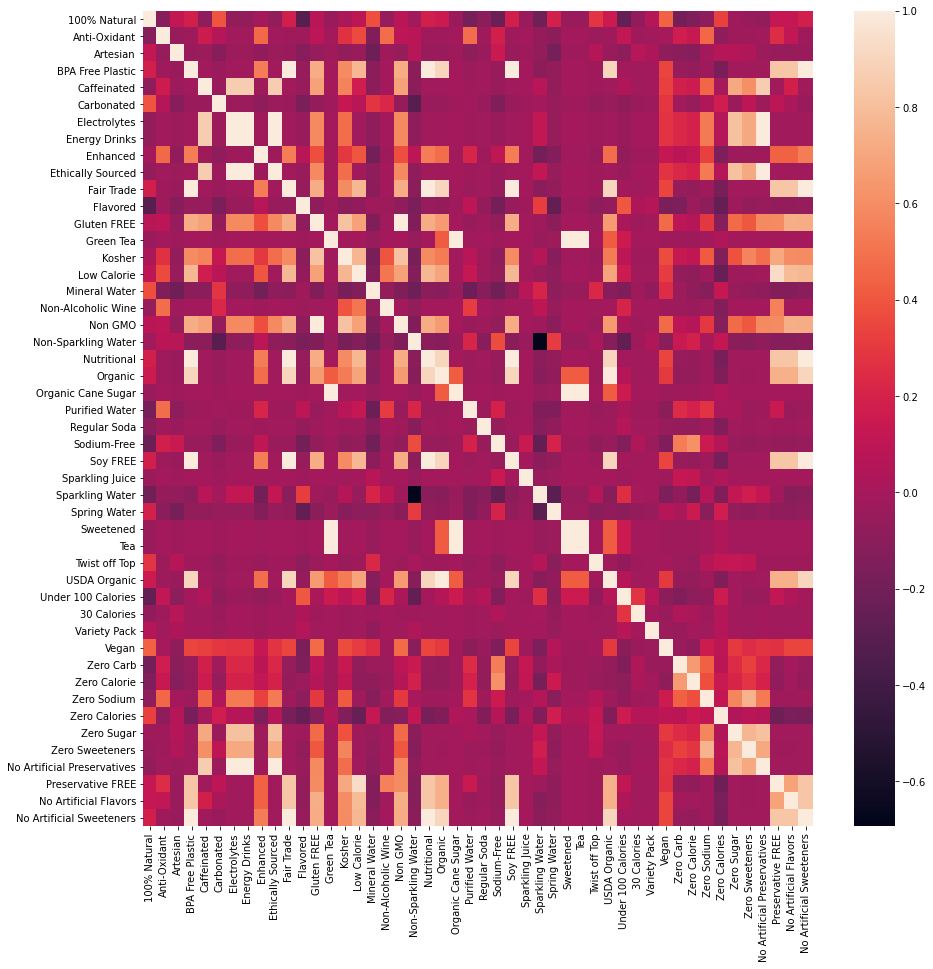

In [ ]:
plt.figure(figsize=(15,15))
ohe_corr = df[ohe_bool_features].corr(matthews_corrcoef)
sns.heatmap(data = ohe_corr)
plt.show()

We can combine the features: 'No Artificial Preservatives','Preservative FREE','No Artificial Flavors','No Artificial Sweeteners' into one 

In [ ]:
df['Label of No Added Preservatives'] = 0
df.loc[(df[pres_labels[0]] == 1) | (df[pres_labels[1]] == 1)| (df[pres_labels[2]] == 1) | (df[pres_labels[3]] == 1),'Label of No Added Preservatives'] = 1


In [ ]:
ohe_bool_features = [col for col in df.columns if (df[col].unique().tolist() == [1.0,0.0] or df[col].unique().tolist() == [0.0,1.0]
                                                   or df[col].unique().tolist() == [0,1] or df[col].unique().tolist() == [1,0])]

In [ ]:
non_ohe_bool_features = [col for col in df.columns if ((col not in ohe_bool_features) and (col not in pres_labels))]
cat_features = [col for col in non_ohe_bool_features if df[col].dtypes == 'O']
numeric_features = ['Pack Size','Price','Beverage Size']

In [ ]:
cat_features.extend(numeric_features)
non_ohe_bool_features = cat_features
print(cat_features)

['Brand', 'Water Source', 'Container', 'Flavor', 'Pack Size', 'Price', 'Beverage Size']


From this correlation plot, we see that a lot of the features are redundant and can be dropped. 

To start off, we shall obtain all didchotomus boolean features which have very low variance 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thres = VarianceThreshold(threshold = 0.0)
var_thres.fit(df[ohe_bool_features])

VarianceThreshold(threshold=0.0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

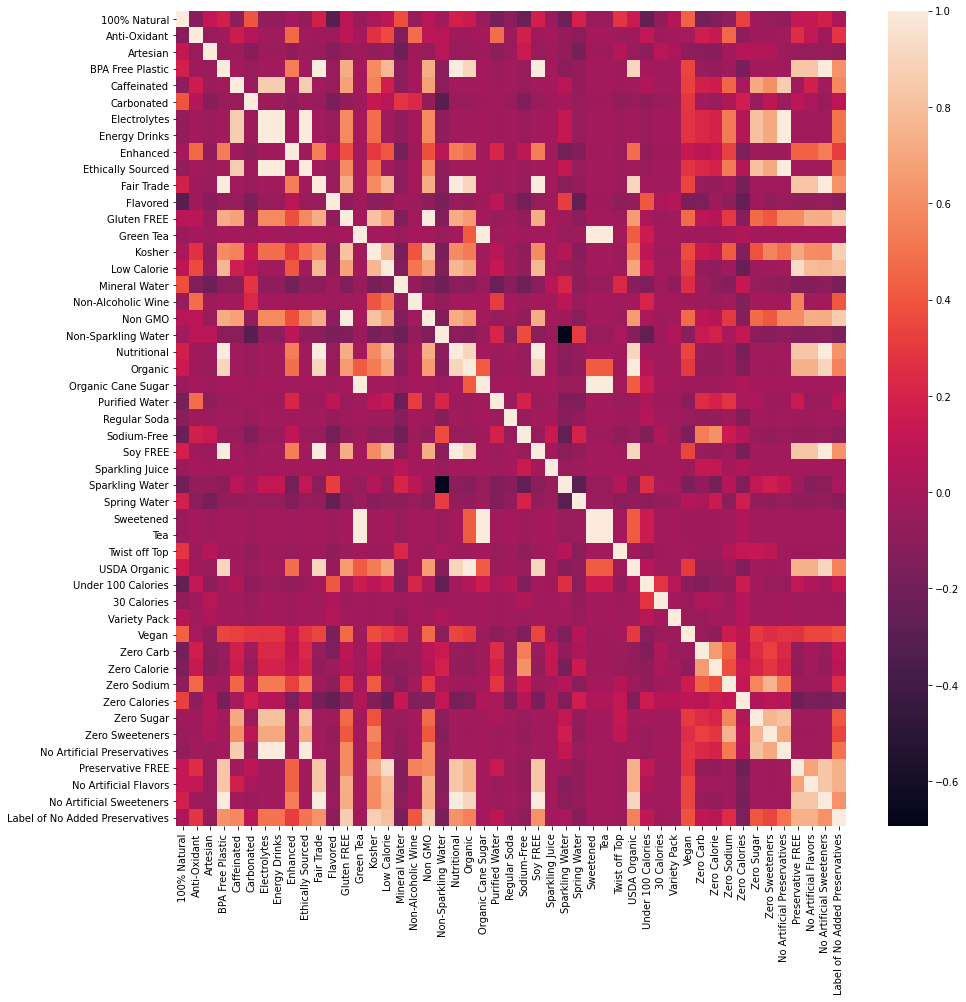

In [ ]:
plt.figure(figsize=(15,15))
ohe_corr = df[ohe_bool_features].corr(matthews_corrcoef)
sns.heatmap(data = ohe_corr)
plt.show()

In [ ]:
def corre_columns(data_set, ohe_bool_features,threshold):
  col_corr = dict()
  corr_matrix = data_set[ohe_bool_features].corr(matthews_corrcoef)
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
              colname = corr_matrix.columns[i]  # getting the name of column
              colname2 = corr_matrix.columns[j]
              col_corr[colname] = colname2
  return col_corr

In [ ]:
drop_cols = corre_columns(df, ohe_bool_features, 0.8)

In [ ]:
df = df.drop(columns = drop_cols.keys())

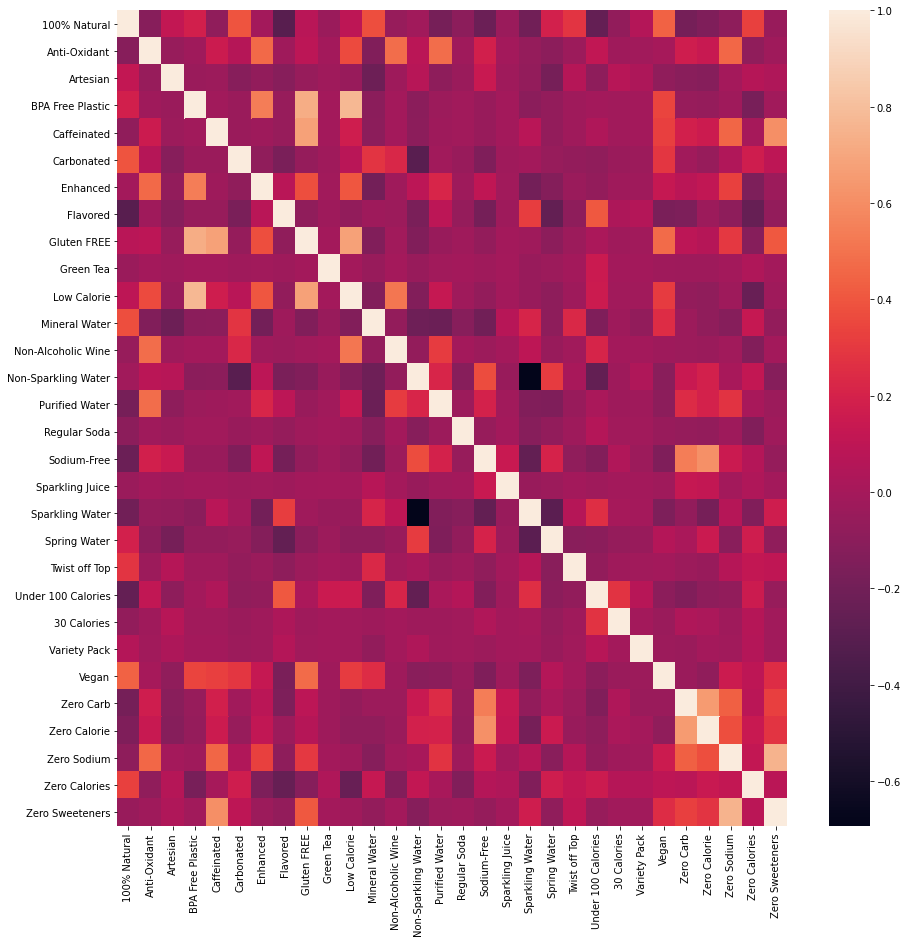

In [ ]:
plt.figure(figsize=(15,15))
new_ohe_features = [feature for feature in ohe_bool_features if feature not in drop_cols.keys()]
ohe_corr = df[new_ohe_features].corr(matthews_corrcoef)
sns.heatmap(data = ohe_corr)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from scipy.stats import pointbiserialr

In [ ]:
p_val_dict = dict()
for feature in new_ohe_features:
  dicot_data = df[feature]
  cont_data = df['Price']
  corr, p_val = pointbiserialr(dicot_data, cont_data)
  p_val_dict[feature] = p_val

In [ ]:
sorted_p_val_dict = sorted(p_val_dict.items(), key = lambda kv: kv[1])
sorted_p_val_dict 

[('Twist off Top', 4.9378544876531256e-14),
 ('Carbonated', 2.9237151926554376e-13),
 ('Vegan', 5.5511468648118064e-11),
 ('Mineral Water', 2.9999526364465835e-08),
 ('100% Natural', 3.0858486700339014e-07),
 ('Non-Alcoholic Wine', 6.008226193824504e-06),
 ('Flavored', 3.13624523732394e-05),
 ('Zero Calories', 0.00019265821737080092),
 ('Anti-Oxidant', 0.006538249481669615),
 ('Zero Calorie', 0.010186118014281924),
 ('Regular Soda', 0.02138960435364235),
 ('Enhanced', 0.03672785204080852),
 ('Purified Water', 0.0634947885918097),
 ('Non-Sparkling Water', 0.06363195907978553),
 ('Sparkling Water', 0.07371213524426112),
 ('BPA Free Plastic', 0.07409138089857986),
 ('Zero Carb', 0.07851224557073042),
 ('Zero Sodium', 0.3114433868000267),
 ('Low Calorie', 0.3165116464615565),
 ('Gluten FREE', 0.3447022404446692),
 ('Variety Pack', 0.36899645156934663),
 ('Artesian', 0.37845280080597465),
 ('Spring Water', 0.4332609397718247),
 ('Sodium-Free', 0.5995361041256294),
 ('Caffeinated', 0.6003502

In [ ]:
non_ohe_bool_features = [cat for cat in non_ohe_bool_features if cat != 'Price']

In [ ]:
for feature in non_ohe_bool_features:
  mean_encoded_subject = df.groupby([feature])['Price'].mean().to_dict()
  df[feature] = df[feature].map(mean_encoded_subject)

In [ ]:
(df[non_ohe_bool_features])

,Brand,Water Source,Container,Flavor,Pack Size,Beverage Size
0,26.932727,37.312317,39.420486,38.170435,14.420000,38.899298
1,31.814211,37.312317,39.420486,38.170435,27.093478,40.035741
2,19.990000,29.325676,27.572727,19.990000,42.663416,24.176623
3,36.534000,29.325676,39.420486,38.170435,26.800857,33.848841
4,28.340714,37.312317,39.420486,38.170435,42.663416,24.176623
...,...,...,...,...,...,...
596,48.584667,50.290909,39.420486,38.170435,42.663416,35.898736
597,32.164815,37.312317,39.420486,38.170435,50.035000,33.990000
598,38.267059,37.312317,39.420486,38.170435,38.145381,38.899298
599,53.947143,50.290909,39.420486,38.170435,26.800857,33.848841


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       601 non-null    float64
 1   Pack Size                   601 non-null    float64
 2   Water Source                601 non-null    float64
 3   Container                   601 non-null    float64
 4   Price                       601 non-null    float64
 5   100% Natural                601 non-null    int64  
 6   Anti-Oxidant                601 non-null    int64  
 7   Artesian                    601 non-null    int64  
 8   BPA Free Plastic            601 non-null    int64  
 9   Caffeinated                 601 non-null    int64  
 10  Carbonated                  601 non-null    int64  
 11  Enhanced                    601 non-null    int64  
 12  Flavored                    601 non-null    int64  
 13  Gluten FREE                 601 non